In [3]:
import pandas as pd

# Using a relative path to read the CSV file
csv_file_path = './pi2b_yeojohnson_4.csv'

# Load the data into a DataFrame
try:
    df = pd.read_csv(csv_file_path)
except FileNotFoundError:
    print("The file was not found at the specified path.")

# Group by label and count the occurrences
count_by_label = df['label'].value_counts()

# Group by label and calculate mean for all other columns
mean_by_label = df.groupby('label').mean()

# Group by label and calculate standard deviation for all other columns
std_by_label = df.groupby('label').std()

# Display the results
print(f"Count by label:\n{count_by_label}\n")
print(f"Mean by label:\n{mean_by_label}\n")
print(f"Standard Deviation by label:\n{std_by_label}\n")


Count by label:
label
0    72
2    67
1    65
3     7
Name: count, dtype: int64

Mean by label:
       sdram_freq  cpu_cores    cpu_freq   avg_fps  total_time   mem_limit_kb
label                                                                        
0      325.000000   1.000000  750.000000  0.605972   22.965139  611669.333333
1      330.769231   4.000000  743.076923  1.170615   11.723231  633178.584615
2      332.835821   2.000000  761.194030  0.950746   14.539701  606452.537313
3      214.285714   2.571429  600.000000  0.911429   15.192857  711533.714286

Standard Deviation by label:
       sdram_freq  cpu_cores    cpu_freq   avg_fps  total_time   mem_limit_kb
label                                                                        
0       85.990501     0.0000  112.587994  0.072610    2.680520  329245.432544
1       85.097512     0.0000  107.484346  0.126773    1.322694  327326.923626
2       83.734899     0.0000  108.649037  0.112698    1.726983  329727.715213
3       24.39750

In [4]:
# Remove rows where label is 3
df_filtered = df[df['label'] != 3]

# Save the new DataFrame to a new CSV file
new_csv_file_path = './pi2b_yeojohnson_4_filtered.csv'
df_filtered.to_csv(new_csv_file_path, index=False)

# Output message to indicate successful saving
print(f"Filtered data saved to {new_csv_file_path}")

Filtered data saved to ./pi2b_yeojohnson_4_filtered.csv


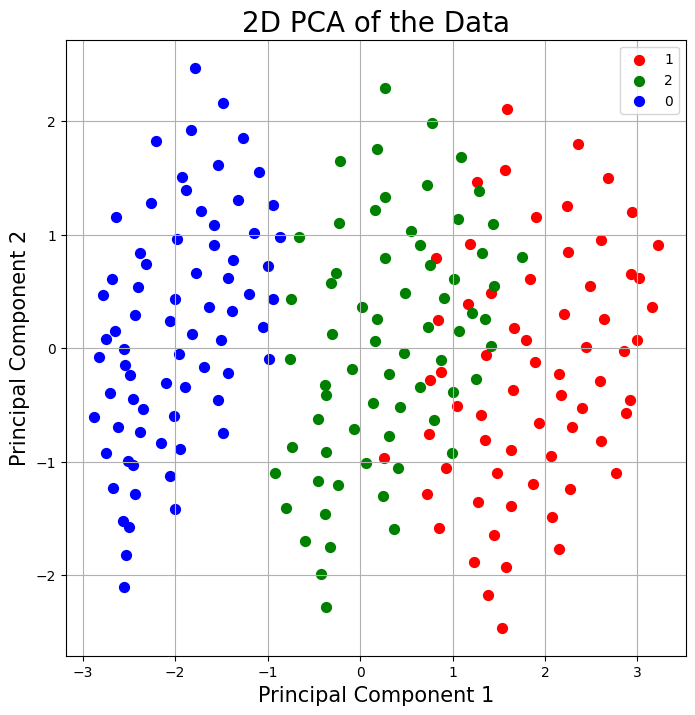

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import PowerTransformer

# Using a relative path to read the CSV file
csv_file_path = './pi2b_yeojohnson_4_filtered.csv'

# Load the data into a DataFrame
try:
    df = pd.read_csv(csv_file_path)
except FileNotFoundError:
    print("The file was not found at the specified path.")

# Use PowerTransformer with yeojohnson method for preprocessing
scaler = PowerTransformer(method='yeo-johnson')
features = ['sdram_freq', 'cpu_cores', 'cpu_freq', 'avg_fps', 'total_time', 'mem_limit_kb']
df_scaled = scaler.fit_transform(df[features])

# Apply PCA and reduce dimensions to 2
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_scaled)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# Add label for coloring
finalDf = pd.concat([principalDf, df[['label']]], axis = 1)

# Plot 2D PCA result
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2D PCA of the Data', fontsize = 20)

labels = list(finalDf['label'].unique())
colors = ['r', 'g', 'b']
for label, color in zip(labels, colors):
    indicesToKeep = finalDf['label'] == label
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(labels)
ax.grid()

# Save the plot
plt.savefig('./2D_PCA_plot.png')

plt.show()


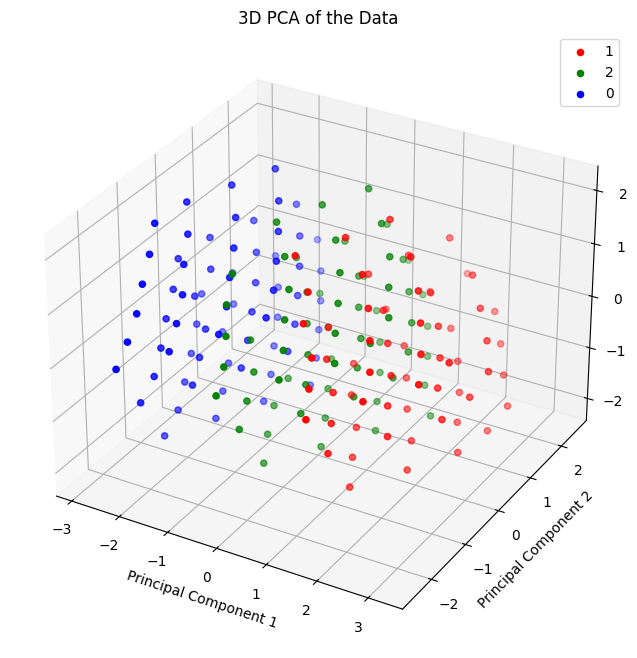

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA

# Load the data
try:
    df = pd.read_csv('./pi2b_yeojohnson_4_filtered.csv')
except FileNotFoundError:
    print("File not found")

# Apply the Yeo-Johnson transformation
scaler = PowerTransformer(method='yeo-johnson')
features = ['sdram_freq', 'cpu_cores', 'cpu_freq', 'avg_fps', 'total_time', 'mem_limit_kb']
x = df.loc[:, features]
x = scaler.fit_transform(x)

# Apply PCA for 3 components
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2', 'PC3'])

# Concatenating DataFrame along axis=1. finalDf is the final DataFrame before plotting the data
finalDf = pd.concat([principalDf, df[['label']]], axis=1)

# Visualize the data
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA of the Data')

labels = list(finalDf['label'].unique())
colors = ['r', 'g', 'b', 'y']
for label, color in zip(labels, colors):
    indicesToKeep = finalDf['label'] == label
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , finalDf.loc[indicesToKeep, 'PC3']
               , c=color)

ax.legend(labels)

# Save the plot
plt.savefig('./3D_PCA_plot.png')

plt.show()
